<a href="https://colab.research.google.com/github/lukedup/CECASEM/blob/trata_y_trafico/personas_desaparecidas_analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# Importar datos

In [ ]:
url = 'https://raw.githubusercontent.com/lukedup/CECASEM/main/trato_y_trafico%20-%20Sheet1.csv'

In [ ]:
df_datos = pd.read_csv(
    filepath_or_buffer=url,
    parse_dates=['Fecha']
)

In [ ]:
df_datos.shape

(212, 12)

# Limpieza de datos

In [ ]:
#@title
df_datos['Sexo'] = df_datos['Sexo'].str.strip()

In [ ]:
#@title
df_datos['Nacionalidad'] = df_datos['Nacionalidad'].str.strip()

# Explicación

La División Trata y Tráfico de la FELCC tiene una página en Facebook (https://www.facebook.com/trataytraficopoliciaboliviana/) donde publica de manera constante las personas que han sido reportadas como desaparecidas por sus familiares. El formato de las publicaciones tiene el siguiente formato:

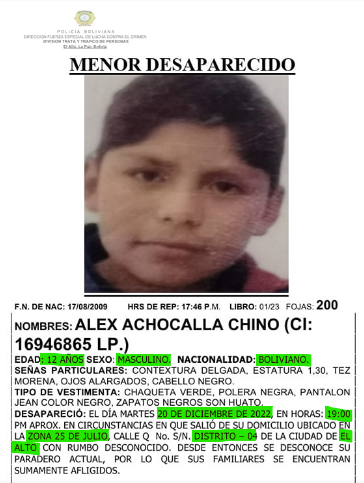

De las publicaciones que se tiene en Facebook, se ha extraido la siguiente información:
- Nombre
- Edad
- Sexo
- Nacionalidad
- Fecha que desaparecio la persona
- Hora (aprox)
- Domicilio o lugar donde se encontraba por última vez
- Ciudad
- Distrito (solo aplica para la ciudad de El Alto)

En base a la información que se obtuvo de estos datos, se pudo formular una encuesta para obtener mayor información. Dicha encuesta fue realizada en los distritos 1, 4, 8, 12, 13 y 14, según los resultados que se muestran a continuación.

# Análsis Exploratorio de los datos (EDA)

In [ ]:
#@title
df_datos.value_counts(
    subset='Aparecio'
).reset_index()

,Aparecio,0
0,No,149
1,Si,63


## Desaparecida o encontrada

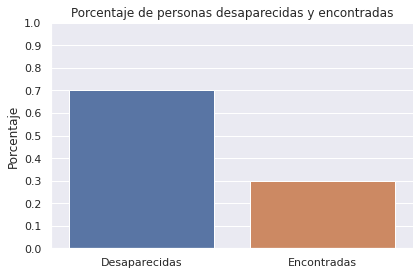

In [ ]:
#@title
aparecio = df_datos.value_counts(
    subset='Aparecio',
    normalize=True
).reset_index()

g = sns.catplot(
    data=aparecio, x='Aparecio', y=0, kind='bar', 
    height=4, aspect=1.5
)
g.set_axis_labels("", "Porcentaje")
g.set_xticklabels(["Desaparecidas", "Encontradas"])
plt.title(
    'Porcentaje de personas desaparecidas y encontradas'
)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

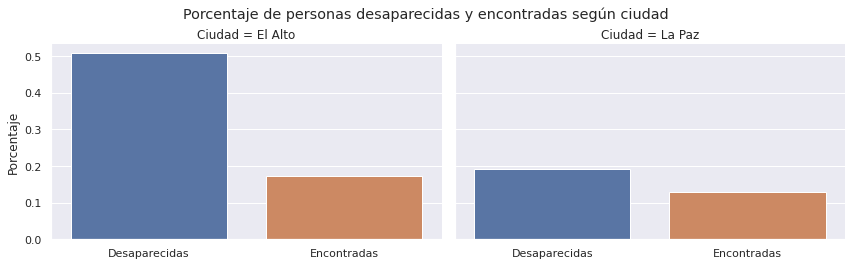

In [ ]:
#@title
aparecio_ciudad = df_datos.value_counts(
    subset=['Ciudad', 'Aparecio'],
    normalize=True
).reset_index()

g = sns.catplot(
    data=aparecio_ciudad, x='Aparecio', y=0, kind='bar', 
    col='Ciudad', col_wrap=2, ci=None,
    height=4, aspect=1.5
)
g.set_axis_labels("", "Porcentaje")
g.set_xticklabels(["Desaparecidas", "Encontradas"])
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle(
    'Porcentaje de personas desaparecidas y encontradas según ciudad'
)
plt.show()

## Edad

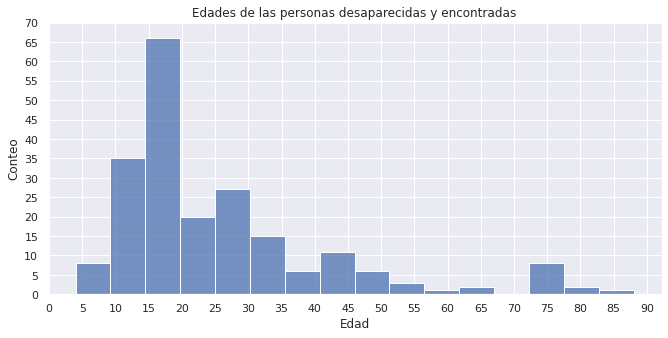

In [ ]:
#@title
plt.figure(figsize = (11, 5))
g = sns.histplot(
    data=df_datos, x='Edad'
)
plt.ylabel('Conteo')
plt.xlabel('Edad')
plt.title('Edades de las personas desaparecidas y encontradas')
plt.xticks(np.arange(0, 91, 5))
plt.yticks(np.arange(0, 75, 5))
plt.show()

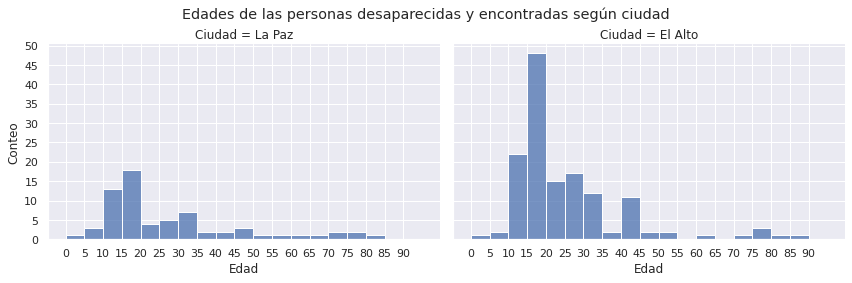

In [ ]:
#@title
g = sns.FacetGrid(
    df_datos, col='Ciudad', col_wrap=2,
    height=4, aspect=1.5
)
g.map(
    sns.histplot, 'Edad', 
    bins=np.arange(0, 100, 5)
)
g.set_axis_labels("Edad", "Conteo")
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Edades de las personas desaparecidas y encontradas según ciudad')
plt.xticks(np.arange(0, 91, 5))
plt.yticks(np.arange(0, 55, 5))
plt.show()

## Sexo

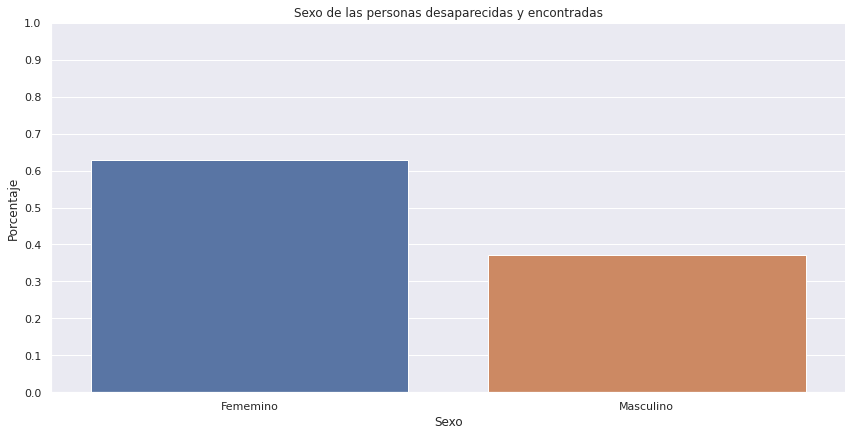

In [ ]:
#@title
sexo = df_datos['Sexo'].value_counts(
    normalize=True
).reset_index()

g = sns.catplot(
    data=sexo, x='index', y='Sexo', kind='bar', 
    height=6, aspect=2
)
g.set_axis_labels("Sexo", "Porcentaje")
g.set_xticklabels(["Fememino", "Masculino"])
plt.title(
    'Sexo de las personas desaparecidas y encontradas'
)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

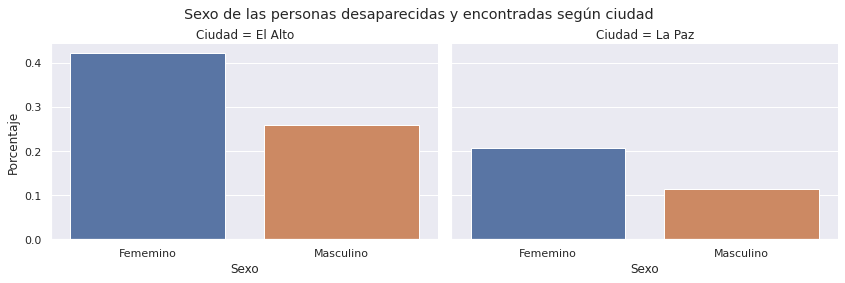

In [ ]:
#@title
sexo_ciudad = df_datos.value_counts(
    subset=['Ciudad', 'Sexo'],
    normalize=True
).reset_index()

g = sns.catplot(
    data=sexo_ciudad, x='Sexo', y=0, kind='bar', 
    col='Ciudad', col_wrap=2, ci=None,
    height=4, aspect=1.5
)
g.set_axis_labels("Sexo", "Porcentaje")
g.set_xticklabels(["Fememino", "Masculino"])
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle(
    'Sexo de las personas desaparecidas y encontradas según ciudad'
)
plt.show()

## Distrito

In [ ]:
#@title
df_el_alto = df_datos.dropna(
    subset=['Distrito'],
    axis=0
).copy()

In [ ]:
#@title
df_el_alto.loc[
    :,
    'Distrito'
] = df_el_alto['Distrito'].astype('int')

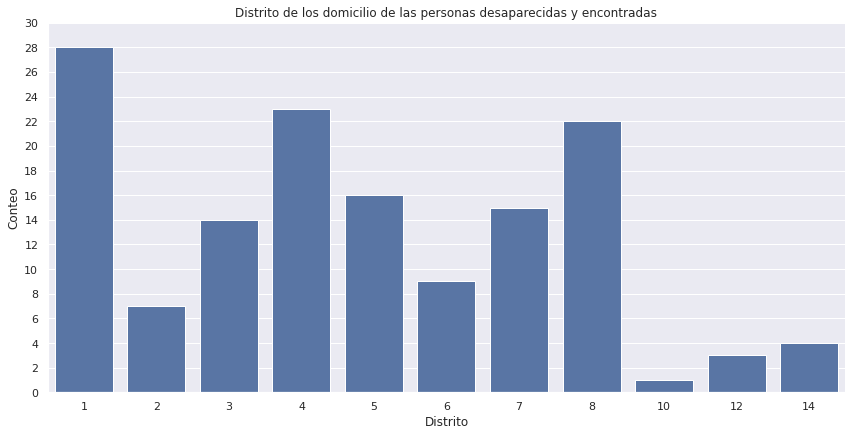

In [ ]:
#@title
distrito = df_el_alto.value_counts(
    subset='Distrito'
).reset_index()

g = sns.catplot(
    data=distrito, x='Distrito', y=0, kind='bar', 
    ci=None, color='b',
    height=6, aspect=2
)
plt.xlabel('Distrito')
plt.ylabel('Conteo')
plt.title(
    'Distrito de los domicilio de las personas desaparecidas y encontradas'
    )
plt.yticks(np.arange(0, 32, 2))
plt.show()

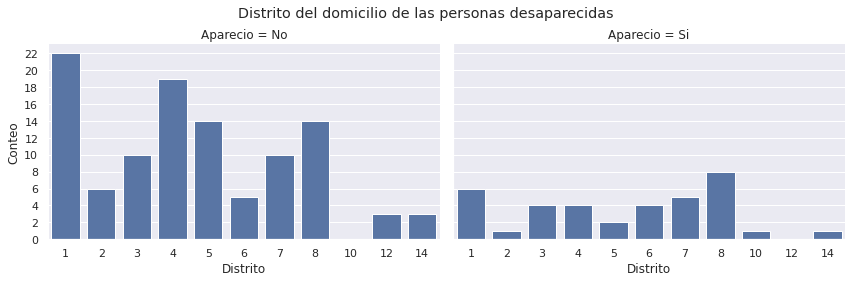

In [ ]:
#@title
distrito_aparecio = df_el_alto.value_counts(
    subset=['Aparecio', 'Distrito']
).reset_index()

g = sns.catplot(
    data=distrito_aparecio, x='Distrito', y=0, kind='bar', 
    col='Aparecio', col_wrap=2,
    ci=None, color='b', 
    height=4, aspect=1.5
)
g.set_axis_labels("Distrito", "Conteo")
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle(
    'Distrito del domicilio de las personas desaparecidas'
)
plt.yticks(np.arange(0, 24, 2))
plt.show()

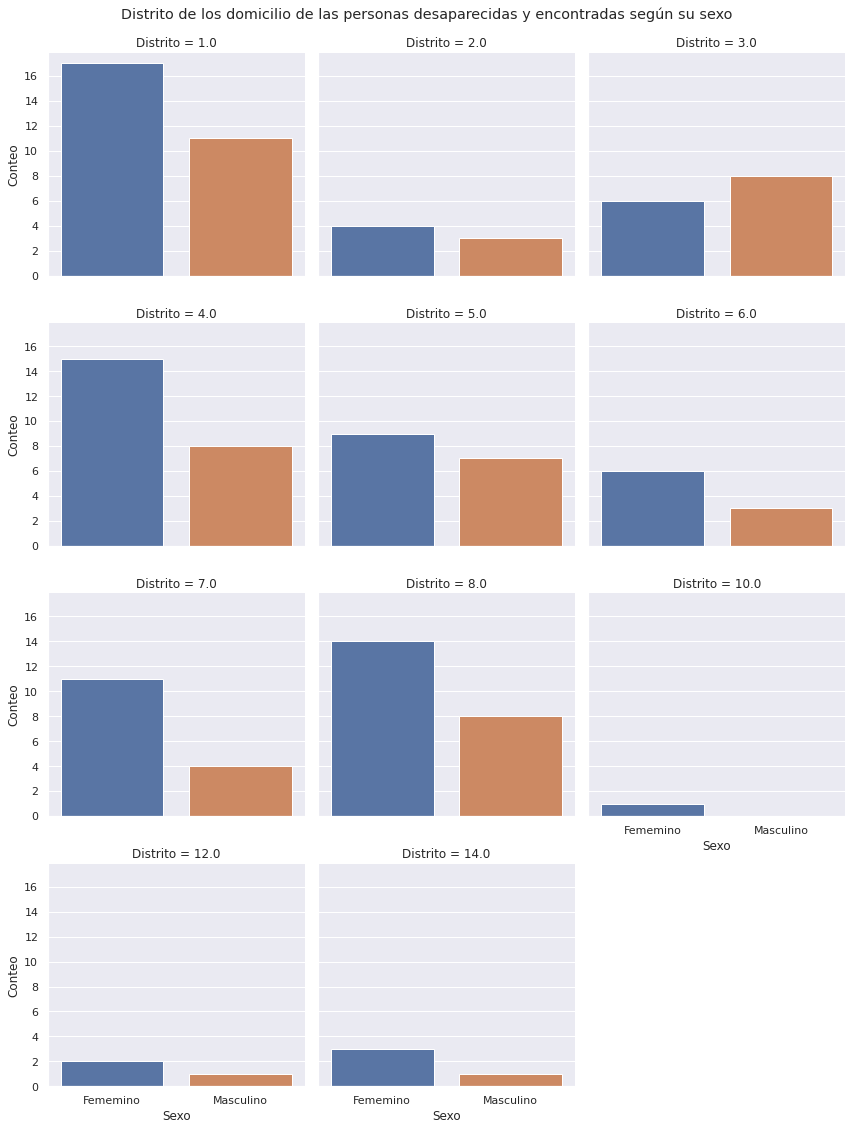

In [ ]:
#@title
x = df_datos.value_counts(['Distrito', 'Sexo']).reset_index()

g = sns.catplot(
    data=x, x="Sexo", y=0, kind="bar",
    col='Distrito', col_wrap=3,
    ci=None,
    height=4
)
g.set_axis_labels("Sexo", "Conteo")
g.set_xticklabels(["Fememino", "Masculino"])
g.fig.subplots_adjust(top=0.94)
g.fig.suptitle(
    'Distrito de los domicilio de las personas desaparecidas y encontradas según su sexo'
)
plt.show()